In [1]:
# Plant Leaf Classification using Multilayer Perceptron Neural Network

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [50]:
leaf_data = pd.read_csv('C:\Ekundayo\project@futa\leaf_data.csv')

In [51]:
leaf_data.head(-5)

,class,s[ecies,Eccentricity,Aspect ratio,Elongation,Solidity,Stochastic convexity,Isoperimetric factor,Max Ident Depth,Lobedness,Average intensity,Average contrast,smoothness,Third moment,Uniformity,Entropy
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,16,2,0.61717,1.2296,0.34897,0.93189,0.97368,0.60176,0.025375,0.117190,0.012906,0.070197,0.004903,0.001932,0.000024,0.37728
355,16,3,0.62404,1.1599,0.47899,0.91562,0.85088,0.45154,0.097205,1.719700,0.013983,0.076408,0.005804,0.002411,0.000026,0.36029
356,16,4,0.48229,1.1574,0.42617,0.91741,0.92456,0.46699,0.063396,0.731470,0.026522,0.105000,0.010904,0.004468,0.000068,0.63468
357,16,5,0.56840,1.1876,0.48001,0.91247,0.79474,0.38850,0.089162,1.446900,0.027113,0.101820,0.010261,0.003789,0.000107,0.65567


In [52]:
leaf_data.shape

(364, 16)

In [53]:
#Selecting the necessary features as input

In [54]:
X_leaf = leaf_data[["Aspect ratio", "Elongation", "Solidity", "Stochastic convexity",
             "Isoperimetric factor", "Max Ident Depth", "Lobedness","Average contrast", "Eccentricity","smoothness"]]

In [55]:
X_leaf.head()

,Aspect ratio,Elongation,Solidity,Stochastic convexity,Isoperimetric factor,Max Ident Depth,Lobedness,Average contrast,Eccentricity,smoothness
0,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.127950,0.72694,0.016108
1,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.090476,0.74173,0.008119
2,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.057445,0.76722,0.003289
3,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.065491,0.73797,0.004271
4,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.045339,0.82301,0.002051


In [56]:
#Selecting the necessary features as output

In [57]:
Y_leaf=leaf_data[["class"]]

In [58]:
Y_leaf

,class
0,1
1,1
2,1
3,1
4,1
...,...
359,16
360,16
361,16
362,16


In [59]:
print(Y_leaf.shape)

(364, 1)


In [60]:
#Preprocessing the input data to avoid bias

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
scaler.fit(X_leaf)
X_data = scaler.transform(X_leaf)

In [62]:
X_data

array([[0.07621345, 0.22246849, 0.99001783, ..., 0.37429134, 0.65494908,
        0.20592494],
       [0.08460736, 0.27635811, 0.98243216, ..., 0.22089734, 0.67445787,
        0.09459891],
       [0.09223523, 0.31810807, 0.97456922, ..., 0.08569008, 0.70808051,
        0.02728348],
       ...,
       [0.0356619 , 0.35920614, 0.90552585, ..., 0.15706982, 0.48988287,
        0.05915463],
       [0.03184796, 0.43931624, 0.80855615, ..., 0.27568267, 0.53430855,
        0.13017   ],
       [0.03729178, 0.40486745, 0.83937413, ..., 0.0928739 , 0.55409434,
        0.03011663]])

In [469]:
Y_data = np.ravel(Y_leaf)

In [470]:
X_train, X_test,Y_train,Y_test = train_test_split(X_data,Y_data, test_size=0.3, random_state = 2)

In [1]:
#Creating MLP model
model = MLPClassifier(max_iter=1000, activation='relu', hidden_layer_sizes=(100,100,100,100,100,100,100,100,100,100))

NameError: name 'MLPClassifier' is not defined

In [472]:
model.fit(X_train,Y_train,)

MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100,
                                  100),
              max_iter=500)

In [478]:
#MLPClassifier?

In [474]:
model.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

In [475]:
model_pred_test = model.predict(X_test)

In [476]:
test_accuracy_score=accuracy_score(Y_test, model_pred_test)
print(test_accuracy_score*100)

81.81818181818183


[[ 7  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 1  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  4  0  0  0  0  0  0  0  0  1  0  0  1]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  3  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  4  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  4  7  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  3  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  6]]


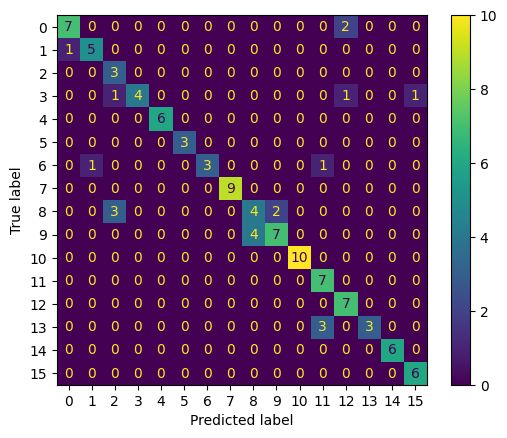

In [477]:
cm = confusion_matrix(Y_test, model_pred_test)
print(cm)
matix_display = ConfusionMatrixDisplay(confusion_matrix = cm)
matix_display.plot()